# Réalisation du projet en autonomie

In [ ]:
#Chargement des librairies
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import time
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# les classes
CLASSES = ["Cat", "Cow", "Dog", "Elephant", "Panda"]

#Chargement des images
def load_data() :

    # import images from ./transfert/{class}/img.*
    X = []
    label = []
    for c in CLASSES:
        # lire de dossier "./transfert/{c} et charger les images
        DIRNAME = f"./transfert/{c}"

        for img_name in os.listdir(DIRNAME):
            # charger l'image
            img = cv2.imread(DIRNAME + "/" + img_name)
            # redimensionner l'image en 224 224  et ramener l'image entre 0 et 1
            img = np.float32((cv2.resize(img, (224, 224)))) / 255.0
            # ajouter l'image dans X
            X.append(img)
            # ajouter le label dans label
            label.append(CLASSES.index(c))



    dim_img = X[0].shape
    X = np.array(X)

    # target 
    Target = np.zeros((len(X), len(CLASSES)), 'int')
    for i in range(len(X)):
        Target[i, label[i]] = 1

    return X, Target, label, dim_img


# chargement des données
X, Target, label, dim_img = load_data()

# creation d'un ensemble de test et d'apprentissage et affichage d'exemple
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.2, random_state=1)

# affichage d'exemple
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(CLASSES[np.argmax(y_train[i])])
    plt.axis("off")




In [67]:
# util (show accuracy and confusion matrix, and loss)
def show_metrics(Y_test, Y_pred, history, name = ""):

    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))

    # show accuracy at the first column
    axes[0].set_title('Accuracy ' + name)
    axes[0].plot(history.history['accuracy'], 'g--' )
    axes[0].plot(history.history['val_accuracy'], 'g')
    axes[0].legend(['Training', 'Validation'])

    # show confusion matrix in another row
    confusionMatrix = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=CLASSES)
    disp.plot(include_values=True, cmap=plt.cm.Blues, ax=axes[1], xticks_rotation='vertical')
    axes[1].set_title('Confusion Matrix ' + name)

    # show loss at the second column
    axes[2].set_title('Loss ' + name)
    axes[2].plot(history.history['loss'], 'r--' )
    axes[2].plot(history.history['val_loss'], 'r')
    axes[2].legend(['Training', 'Validation'])
    
    plt.show()

# fonction qui lance l'entrainement d'un model avec des hyperparametres donnés et calcule le temps
def launch_tain(model, X_train, y_train, X_test, y_test, epochs, batch_size, learning_rate=0.001, loss="", name = ""):
    # compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=loss, metrics=['accuracy'])

    # train model
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
    print("Temps d'entrainement : %s secondes ---" % (time.time() - start_time))

    # evaluate model
    Y_pred = model.predict(X_test)
    show_metrics(y_test, Y_pred, history, name)
    

Commenter les opérations de chargement et de création des bases

## Structure imposée

In [ ]:
# Création de la structure
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=dim_img),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(CLASSES), activation='softmax')
])
#Apprentissage de la structure
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Entrainement du modèle
#MEsure du temsp d'apprentissage
start_time = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=12, validation_split=0.2)
print("--- %s seconds ---" % (time.time() - start_time))

PREDICTION = model.predict(X_test)



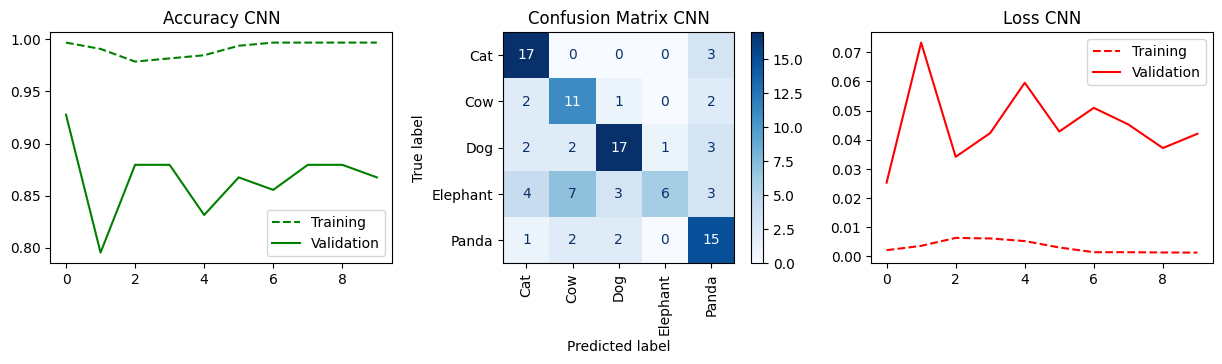

In [68]:
#Etude des courbes d'apprentissage
show_metrics(y_test, PREDICTION, history, "CNN")

Commentaire sur l'apprentissage

In [ ]:
#Etude des résultats globaux et par classe

Commentaire sur l'efficience du modèle et conclusion

## Structure libre mais à complexité contrôlée

In [ ]:
# Création de la structure
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu', padding='same', input_shape=dim_img),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(CLASSES), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Apprentissage de la structure


start_time = time.time()
history = model.fit(X_train, y_train, epochs=20, batch_size=12, validation_split=0.2)


#MEsure du temsp d'apprentissage
#Etude des courbes d'apprentissage

In [ ]:
# test avec plusieur couche 

Commentaire sur l'apprentissage et sur les choix faits pour la structure

In [ ]:
#Etude des résultats globaux et par classe

Commentaire sur l'efficience du modèle, comparaison avec le premier modèle et conclusion

## Structure libre mais à discrimination optimale

In [ ]:
# Création de la structure
#Apprentissage de la structure
model.save('my_modele')
#MEsure du temsp d'apprentissage
#Etude des courbes d'apprentissage

Commentaire sur l'apprentissage et sur les choix faits pour la structure

In [ ]:
#Etude des résultats globaux et par classe

Commentaire sur l'efficience du modèle, comparaison avec les premiers modèles et conclusion

## Création d'une structure autoencodeur

In [ ]:
# codeur correspond à la structure imposée
#décodeur
#autoencoder_dr = Model(inputs = encoder.inputs, outputs = decoder(encoder.outputs))
# Apprentissage avec comme fonction de cout mse

Commentaire sur l'apprentissage et sur les choix faits pour la structure

In [ ]:
#Projection d'images de la base
#autoencoder_dr.predict()

Commentaire sur la qualité d'approximation de votre autoencodeur évaluée par traitement de différentes images de la base

## Transfert learning du codeur

In [ ]:
# récupération du codeur de l'autoencodeur
# Ajout de couche de prise de décision
# Apprentissage en bloquant les poids du codeur
for layer in encoder.layers:
    layer.trainable = False

Commentaire sur l'apprentissage et sur la structure

In [ ]:
#Etude des résultats globaux et par classe

Commentaire sur l'efficience du modèle, comparaison avec le premier modèle et conclusion

## Influence du bruit

In [ ]:
def ma_fonction(Data):
    Data_b = Data.copy()
    for nb in range(0,len(Data)):
        Data_b[nb] = Data[nb]+(np.random.rand(Data[nb].shape[0],Data[nb].shape[1],Data[nb].shape[2])*0.7)
    Data_b = np.clip(Data_b,0.,1.)
    return Data_b

Expliciter ce que réalise cette fonction et indiquant l'opération réalisée par chaque ligne

In [ ]:
#Test sur la meilleure structure 
my_model = keras.models.load_model('modele')
X_test_b = ma_fonction(X_test)
test_loss, test_acc = model.evaluate(X_test_b, y_test)

Commenter les opérations, évaluer les résultats par rapport à ceux obtenus sur X_test.

## Autoencodeur contre le bruit